In [1]:
xn = [0, -1, 0, 3, 0]
print(len(xn)%2 == 1)
if int(len(xn))%2 == 1:
    origin = xn [int(len(xn))//2]
    print(origin)
else:
    print("cannot determine the sequence")

True
0


Length is Odd: True
Origin Value: 1
n:       [-2 -1  0  1  2]
x_even:  [0. 2. 1. 2. 0.]
x_odd:   [ 0. -5.  0.  5.  0.]


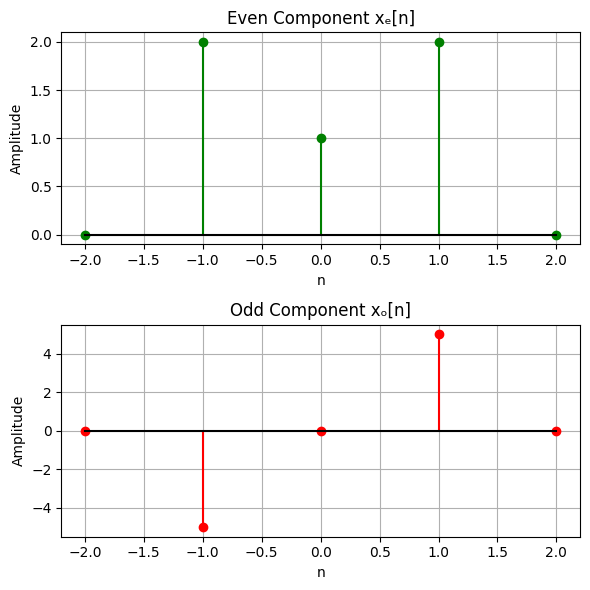

In [1]:
import numpy as np
import matplotlib.pyplot as plt

xn = [0, -3, 1, 7, 0]
print("Length is Odd:", len(xn) % 2 == 1)

if len(xn) % 2 == 1:
    origin = xn[len(xn)//2]
    print("Origin Value:", origin)

    x = np.array(xn)
    n = np.arange(-(len(x)//2), len(x)//2 + 1)

    x_rev = x[::-1]
    x_even = 0.5 * (x + x_rev)
    x_odd  = 0.5 * (x - x_rev)

    print("n:      ", n)
    print("x_even: ", x_even)
    print("x_odd:  ", x_odd)

    plt.figure(figsize=(6, 6))

    # Even component
    plt.subplot(2, 1, 1)
    plt.stem(n, x_even, basefmt="k-", linefmt="g-", markerfmt="go")
    plt.title("Even Component xₑ[n]")
    plt.xlabel("n")
    plt.ylabel("Amplitude")
    plt.grid(True)

    # Odd component
    plt.subplot(2, 1, 2)
    plt.stem(n, x_odd, basefmt="k-", linefmt="r-", markerfmt="ro")
    plt.title("Odd Component xₒ[n]")
    plt.xlabel("n")
    plt.ylabel("Amplitude")
    plt.grid(True)

    plt.tight_layout()
    plt.show()

else:
    print("Cannot Determine the Sequence")
